In [2]:
import pathlib

from typing import List

import pandas as pd
import seaborn as sns
import webdataset as wds

In [3]:
root_path = pathlib.Path("../data/shards_vox2_full")
train_path = root_path / "train"
val_path = root_path / "val"

In [4]:
def find_tar_files(path: pathlib.Path):
    return [f for f in path.glob('*.tar*') if f.is_file()]


In [5]:
def retrieve_meta_json_files(shard_list: List[pathlib.Path]):
    ds = wds.WebDataset(urls=[shard_list])

    pass

In [6]:
tar_files = find_tar_files(train_path)
print(tar_files[0:10])
retrieve_meta_json_files(tar_files)

[PosixPath('../data/shards_vox2_full/train/train_shard_000000.tar'), PosixPath('../data/shards_vox2_full/train/train_shard_000001.tar'), PosixPath('../data/shards_vox2_full/train/train_shard_000002.tar'), PosixPath('../data/shards_vox2_full/train/train_shard_000003.tar'), PosixPath('../data/shards_vox2_full/train/train_shard_000004.tar'), PosixPath('../data/shards_vox2_full/train/train_shard_000005.tar'), PosixPath('../data/shards_vox2_full/train/train_shard_000006.tar'), PosixPath('../data/shards_vox2_full/train/train_shard_000007.tar'), PosixPath('../data/shards_vox2_full/train/train_shard_000008.tar'), PosixPath('../data/shards_vox2_full/train/train_shard_000009.tar')]


AssertionError: 

In [27]:
# plot different distribution

In [28]:
def num_speakers(folder: pathlib.Path):
    speaker_dirs = [f for f in folder.iterdir() if f.name[0:2] == "id"]

    return len(speaker_dirs)

In [29]:
def num_recordings(folder: pathlib.Path):
    speaker_dirs = [f for f in folder.iterdir() if f.name[0:2] == "id"]
    sum_recordings = sum([len(list(f.iterdir())) for f in speaker_dirs if f.is_dir()])

    return sum_recordings

In [38]:
def num_audio_files(folder: pathlib.Path):
     audio_files = [f for f in folder.rglob("*/*/*.wav")]

     return len(audio_files)

In [ ]:
def duration_audio(folder: pathlib.Path):
    pass

In [31]:
def num_recordings_per_speaker(folder: pathlib.Path):
    speaker_dirs = [f for f in folder.iterdir() if f.name[0:2] == "id"]
    recording_count = [len(list(f.iterdir())) for f in speaker_dirs if f.is_dir()]

    return recording_count

In [32]:
def num_files_per_recording(folder: pathlib.Path):
    speaker_dirs = [f for f in folder.iterdir() if f.name[0:2] == "id"]
    recording_dirs = []

    for f in speaker_dirs:
        for r in f.iterdir():
            if r.is_dir():
                recording_dirs.append(r)

    num_files = []
    for f in recording_dirs:
        files = [g for g in f.iterdir() if g.is_file() and ".wav" in g.name]
        num_files.append(len(files))

    return num_files

In [33]:
def total_audio_length_per_speaker():

    pass

In [34]:
def audio_length_per_file():
    pass

In [11]:
def gender_balance():
    pass

In [12]:
# plot for train

In [35]:
num_speakers(train_path)

5994

In [36]:
num_recordings(train_path)

136512

In [39]:
num_audio_files(train_path)

1069292

count    5994.000000
mean       22.774775
std        14.333993
min         4.000000
25%        11.000000
50%        19.000000
75%        31.000000
max        89.000000
dtype: float64


<AxesSubplot:ylabel='Count'>

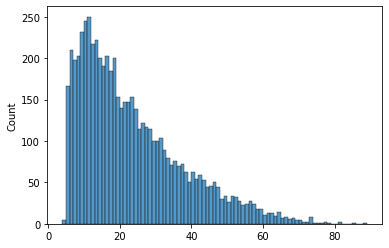

In [22]:
num_rec_per_speaker = pd.Series(num_recordings_per_speaker(train_path))
print(num_rec_per_speaker.describe())
sns.histplot(x=num_rec_per_speaker, binwidth=1)

count    136512.000000
mean          7.832952
std          10.727379
min           1.000000
25%           2.000000
50%           5.000000
75%          10.000000
max         264.000000
dtype: float64


<AxesSubplot:ylabel='Count'>

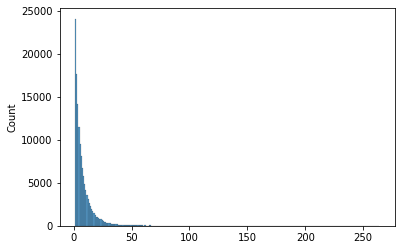

In [41]:
num_file_per_rec = pd.Series(num_files_per_recording(train_path))

print(num_file_per_rec.describe())
sns.histplot(x=num_file_per_rec, binwidth=1)

In [21]:
# plot for val